In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv('Training Data.csv/Training Data.csv')
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [3]:
df.Risk_Flag.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [4]:
df.Profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [5]:
df.CITY.value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [6]:
df.STATE.value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [7]:
df.House_Ownership.value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [8]:
df.Car_Ownership.value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

# Imbalanced target Data - Risk_Flag

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


<AxesSubplot:>

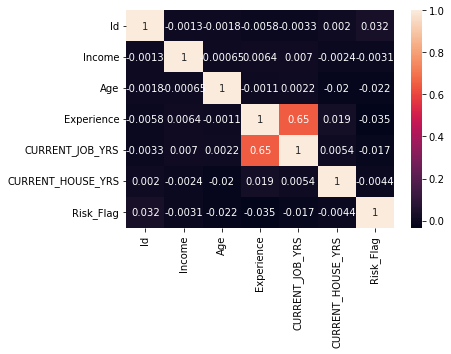

In [10]:





import seaborn as sns
sns.heatmap(df.corr(),annot = True)

In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Car_Ownership']=LE.fit_transform(df['Car_Ownership'])
df['Married/Single']=LE.fit_transform(df['Married/Single'])
df['House_Ownership']=LE.fit_transform(df['House_Ownership'])

In [12]:
df.corr()['Risk_Flag']

Id                   0.032153
Income              -0.003091
Age                 -0.021809
Experience          -0.034523
Married/Single       0.021092
House_Ownership      0.023622
Car_Ownership       -0.024036
CURRENT_JOB_YRS     -0.016942
CURRENT_HOUSE_YRS   -0.004375
Risk_Flag            1.000000
Name: Risk_Flag, dtype: float64

In [13]:
location_count=df.CITY.value_counts()

df['CITY']=df['CITY'].apply(lambda x: 'other' if x in location_count[location_count<=1000] else x )

In [14]:
df.CITY.value_counts()

other            220635
Vijayanagaram      1259
Bhopal             1208
Bulandshahr        1185
Saharsa[29]        1180
Vijayawada         1172
Srinagar           1136
Indore             1130
Hajipur[31]        1098
New_Delhi          1098
Satara             1096
Navi_Mumbai        1084
Jorhat             1079
Ongole             1067
Bellary            1065
Erode[17]          1064
Giridih            1064
Hospet             1058
Jodhpur            1056
Khammam            1051
Danapur            1037
Bareilly           1036
Kolkata            1033
Bidhannagar        1033
Satna              1028
Howrah             1016
Mango              1016
Agra               1012
Thanjavur          1003
Haridwar           1001
Name: CITY, dtype: int64

*We are having city so we can skip the state feature*

In [15]:
df=df.drop(columns=['STATE'])

In [16]:

dummies = pd.get_dummies(df['CITY'])
df = pd.concat([df,dummies], axis='columns')
df.drop('CITY', axis=1, inplace=True)

In [17]:
df.shape

(252000, 41)

In [18]:

dummies = pd.get_dummies(df['Profession'])
df = pd.concat([df,dummies], axis='columns')
df.drop('Profession', axis=1, inplace=True)

In [19]:
df.shape

(252000, 91)

In [20]:
df=df.drop(columns=['Id'])
df = df.rename({'Married/Single': 'marraige'}, axis=1)

In [21]:
X=df.drop(columns=['Risk_Flag'])
Y=df.Risk_Flag

In [22]:
from sklearn.utils import resample



concat = pd.concat([X,Y], axis=1)


no_risk = concat[concat.Risk_Flag==0]
risk = concat[concat.Risk_Flag==1]


risk_upsampled = resample(risk,
                          replace=True,
                          n_samples=len(no_risk), 
                          random_state=27) 


upsampled = pd.concat([no_risk, risk_upsampled])


upsampled.Risk_Flag.value_counts()

0    221004
1    221004
Name: Risk_Flag, dtype: int64

In [23]:
x=upsampled.drop(columns=['Risk_Flag'])
x

,Income,Age,Experience,marraige,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Agra,Bareilly,...,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer
0,1303834,23,3,1,2,0,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,1,2,0,9,13,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3991815,66,4,0,2,0,4,10,0,0,...,0,0,0,0,0,0,1,0,0,0
5,6915937,64,0,1,2,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3954973,58,14,0,2,0,8,12,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48978,5628436,48,13,1,2,0,10,10,0,0,...,0,0,0,0,0,0,0,0,0,0
243845,4294400,57,4,1,2,0,3,12,0,0,...,0,0,0,0,0,0,0,0,0,0
167333,6868118,25,16,1,2,0,13,13,0,0,...,0,1,0,0,0,0,0,0,0,0
216578,3524284,35,8,1,2,0,8,10,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
y=upsampled.Risk_Flag


In [25]:
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size = .25, random_state = 111)


In [26]:

from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
model=RFC.fit(x_train,y_train)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
predictions = model.predict(x_test)

print("\nClassification report:\n", classification_report(y_test, predictions))


Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     55289
           1       0.92      1.00      0.96     55213

    accuracy                           0.95    110502
   macro avg       0.96      0.95      0.95    110502
weighted avg       0.96      0.95      0.95    110502



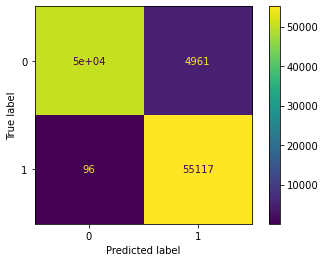

In [28]:
plot_confusion_matrix(model, x_test, y_test)  


In [29]:
df_c = X.columns

In [30]:
print(x_test[5:6])
a = model.predict(x_test[5:6])
print(a)

df_test = x_test[5:6]

         Income  Age  Experience  marraige  House_Ownership  Car_Ownership  \
233369  3119882   56          10         1                2              1   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Agra  Bareilly  ...  Scientist  \
233369               10                 14     0         0  ...          0   

        Secretary  Software_Developer  Statistician  Surgeon  Surveyor  \
233369          1                   0             0        0         0   

        Technical_writer  Technician  Technology_specialist  Web_designer  
233369                 0           0                      0             0  

[1 rows x 89 columns]
[1]


In [31]:
import pickle
pickle.dump(model, open('model.sav', 'wb'))

In [32]:
Model = pickle.load(open(r"model.sav", "rb"))

In [33]:
import numpy
def predict_price(Income,Age,Experience,marraige,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,CITY,Profession,model):
    
    
    
    prof_index = np.where(X.columns == Profession)[0][0]
    loc_index = np.where(X.columns == CITY)[0][0]
    
    
    x = np.zeros(len(X.columns))
    
    x[0] = int(Income)
    x[1] = int(Age)
    x[2] = int(Experience)
    x[3] = int(marraige)
    x[4] = int(House_Ownership)
    x[5] = int(Car_Ownership)
    x[6] = int(CURRENT_JOB_YRS)
    x[7] = int(CURRENT_HOUSE_YRS)
 
    if loc_index >= 0:
        x[loc_index] = 1
    if prof_index >= 0:
        x[prof_index] = 1
    x=x.reshape(1,-1)
    df = pd.DataFrame(x)
    df=df.astype(int)
    print(df)
    ans = model.predict(df)[0]
    print("ans",ans)
    return ans

predict_price(3122882,56,10,1,2,1,10,14,'Bhopal','Secretary',Model)

        0   1   2   3   4   5   6   7   8   9   ...  79  80  81  82  83  84  \
0  3122882  56  10   1   2   1  10  14   0   0  ...   0   1   0   0   0   0   

   85  86  87  88  
0   0   0   0   0  

[1 rows x 89 columns]
ans 1


1

In [34]:
X = X[:0]

In [35]:
df_test.to_csv('Xt.csv')

In [36]:
X=pd.read_csv('X.csv')

X = X.drop(columns=['Unnamed: 0'])

In [37]:
X

,Income,Age,Experience,marraige,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Agra,Bareilly,...,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer


In [38]:
i= np.zeros(len(X.columns))

In [39]:
i

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()

In [41]:
modelGBC = GBC.fit(x_train, y_train)

In [42]:
y_pred = modelGBC.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

print("\nClassification report:\n", classification_report(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.61     55289
           1       0.60      0.59      0.59     55213

    accuracy                           0.60    110502
   macro avg       0.60      0.60      0.60    110502
weighted avg       0.60      0.60      0.60    110502



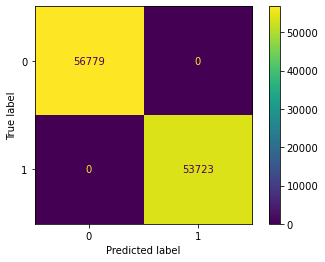

In [44]:
plot_confusion_matrix(modelGBC, x_test, y_pred)  


In [45]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNCmodel = KNC.fit(x_train, y_train)

In [46]:
y_pred1 = KNCmodel.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

print("\nClassification report:\n", classification_report(y_test, y_pred1))


Classification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91     55289
           1       0.87      0.98      0.92     55213

    accuracy                           0.92    110502
   macro avg       0.93      0.92      0.92    110502
weighted avg       0.93      0.92      0.92    110502

